***
***
***
<br><font size = 13><center><u>Use of Unsupervised Learning</u></center></font><br>
    <font size = 7><center>to build customer personas</center></font> <br>
<strong><h2>Team 11 - Castro </h2></strong> <br>
Andrea Piatti <br>
Jacqueline Wagner <br>
Lorenzo Aguilar <br>
Marlene Blandino <br>
Prajakta Parkar <br>
Thiago Marcondes <br>


<h3>Machine Learning : Assignment 3 </h3> <br>
For Professor Chase Kusterer <br>

***

***
<h2> Introduction </h2><br>
<h3> Context </h3><br>
<b><i>Apple vs Windows</i></b> is a rivalry as old as time. With each of them having their own share of loyalists and critics, pros and cons, it has always been a pressing dilemma for a consumer to make a decision. This dilemma extends to the manufacturers while understanding what makes a person buy their products, and more so while understanding who exactly buys their products. With segmenting based on demographics being a passé, in the following analysis, we aim to gather a wholesome understanding of the buying behaviour of consumers who prefer one over the other.<br><br>
We, Team 11 from Castro, have assumed the role of analysts hired by <i>Microsoft</i>. Based on a survey conducted, at Hult International Business School, of potential consumers, we will be responsible for dissecting the data provided, gathering key takeaways and concluding with an immediate actionable recommendation.

***
<h3>Understanding buying behaviour </h3>
The three broad factors that dictate buying behaviour are personal (demographics), psychological (psychographics or psychometrics, and social (external stimuli)<i>(Source: How to Understand and Influence Consumer Behavior, Brandwatch.com)</i>. This particular study will revolve around more intrinsic factors like demographics and psychographics of a consumer. The data to be analysed is primary data (gathered first-handed) via an online survey. It is to be noted that this is a consumer survey which comes with its own limitations like loss of interest by the end of a long survey, incorrect self-perception and dishonest answers. 

<h4>Demographics </h4>
We will dwell over the demographic data collected while analysing the dataset.

<h4>Personality Psychology</h4>
Personality Psychology helps understand the motivations, behaviours, emotions and cognition of a person. This is an effective way of understanding the psychographics of consumers. The survey conducted used the <b>Big 5 (OCEAN)</b> and the proprietary, <b>Hult DNA</b> to gauge the behaviour of respondents.<br>

<h5>The Big 5 Personality </h5>
One of the most popular theories, The Big 5 Personality, often coined as OCEAN, helps understand the extent of the following prevalant in consumers:
<ol>
    <li>Openness </li>
    <li>Conscientousness </li>
    <li>Extraversion </li>
    <li>Agreeableness </li>
    <li>Neuroticism </li>
</ol>
This will help us understand the behaviour of the consumer.

<h5>Hult DNA </h5>
Years of research at the Hult Labs has culminated into nine must-have traits for a student to be employable on graduation. Hult regularly imbibes these within its students. Currently, the Hult DNA consists of 3 broad categories and 3 subcategories within each category, namely:
<ol>
    <li>Thinking </li>
        <ul>
            <li>Shows self-awareness </li>
            <li>Embraces change </li>
            <li>Demonstrates dynamic thinking </li>
        </ul><br>
    <li>Communicating </li>
        <ul>
            <li>Speaks and listens confidentally </li>
            <li>Influences confidentally </li>
            <li>Presents ideas effectively </li>
        </ul><br>
    <li>Team Building </li>
        <ul>
            <li>Fosters collaborative relationships </li>
            <li>Influences productivity </li>
            <li>Resolves conflict constructively </li>
        </ul><br>
</ol>
We will be using the 3 broad categories for the remainder of the study.<br>
This will help us understand the psychometrics of the consumer.

<h5>Caveat for personality types </h5><br>
The Big5 is a spectrum ie each of the five parameters a personality is measured on has an opposite end to it. For example someone who is low on Agreeableness is considered to be competitive or someone low on Extraversion is considered to be an introvert <i>(Source: The Big Five Personality Traits, verywellmind.com)</i>. Every person has traces of all the parameters, some paraemeters may be dominant while some dormant. 

***

<h3>Bifurcating the dataset for analysis</h3><br>
We will be doing our analysis based on demographics and psychographics of the respondents. Big5 and Hult DNA, both provide psychographic(behavioural and psychometric) insight of the potential consumer, thus they would be analysed together and not separately. Demographics will not be a part of the unsupervised learning model but will be used to derive key observations. 

<h2> Methodology </h2>


<h2> Importing the data and understanding it </h2>
<h3> Importing the neccesary libraries </h3>
The ones listed below are the libraries that we will be utilizing throughout our analysis

In [5]:
# Loading packages 
import pandas                as pd                  
import matplotlib.pyplot     as plt
import seaborn               as sns
import sys
from sklearn.decomposition   import PCA
from sklearn.manifold        import TSNE
from sklearn.preprocessing   import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster         import KMeans

<h3>Importing the dataset</h3>
We used the dataset "Survey_Data_Final_Exam" at our disposal.

In [6]:
## Loading dataset 
survey_df = pd.read_excel('Survey_Data_Final_Exam.xlsx')

In [7]:
## Quick overview of the data
#survey_df.head() #Checking the datafile
#survey_df.info() #Checking if any null values - None exist! Hurray!
#survey_df.describe() #Checking the central tendency & dispersion of data
#survey_df.columns #Getting column names


<h3> Understanding the dataset </h3>
<h4> Features </h4>
There are a total of 78 features or variables present in the dataset

<h5> Categorical Features</h5>
5 of the features are give information on the demographics of the person like <i>Nationality, Ethnicity, Gender, Hult Program, Age</i> (numerical currently but will be converted into categorical later), and 
2 of the features are reflective of the laptop preference, existing and in the future, of the respondent

<h5> Numerical Features</h5>
71 out of the 78 features are a combination of the Big5 personality questions and Hult DNA. These are all numerical since the respondents have to rate on a scale from 1 to 5 with 1 being least likely and 5 most.

<h4> Responses </h4>
There a total of 392 responses in the dataset

<h4> Pattern detection in the features </h4> 
The variables (not counting survey ID) ie the questions posed to the respondent have a pattern. The variables follow the following pattern: Extraversion, Agreeableness, Conscientousness, Neuroticism, Openness for the first 50 variables. The next 18 questions are on Hult DNA, with every 6 being on Thinking, Communicating and Team Building respectively. There are 3 repeat questions from the Thinking category. This will help us understand the authenticity of the responses.

<h4>Null or NAs</h4>
There are no null or NAs in the dataset

<h2> Cleaning the data </h2><br>
Survey data is often full of discrepancies (like variant spellings/terms for the same thing or proxy responses) which aren't ideal for analysis and model building. We aim to clean and manipulate the dataset given to optimality.

<h3> Reviewing categorical features and age </h3>

In [8]:
# Reviewing categorical columns and age: 
multipurpose_lst=[]
lst_categorical = ['Gender','What is your nationality? ', 'What is your ethnicity?','What laptop do you currently have?',
       'What laptop would you buy in next assuming if all laptops cost the same?',
       'What program are you in?']

for rows in survey_df.iterrows():
    for columns in lst_categorical:
        columns_values = survey_df[columns].value_counts()
        multipurpose_lst.append(columns_values)
        
multi_df = pd.DataFrame(multipurpose_lst)
#multi_df.to_excel('multi_df.xlsx')

<h3> Outlier Detection and Removal</h3>
<h4> Detecting outliers</h4>

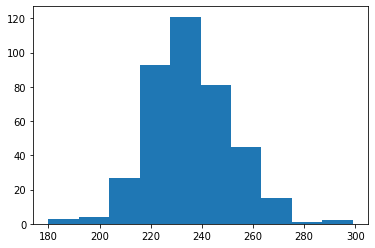

In [9]:
# Reviewing personality respond questions: 
survey_df_noage = survey_df.drop(columns=['What is your age?'], axis = 1) #removing the age so it wont be added to the total column 
survey_df.loc[:,'Total'] = survey_df_noage.sum(numeric_only=True, axis=1)
plt.hist(survey_df['Total'])
plt.show()

<h4> Removing outliers</h4>

In [10]:
## Outliers: 
responses_lo = 200
responses_hi = 280
survey_df['outliers_responses'] = 0

condition_lo = survey_df.loc[0:,'outliers_responses'][survey_df['Total'] < responses_lo]
survey_df['outliers_responses'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)
condition_hi = survey_df.loc[0:,'outliers_responses'][survey_df['Total'] > responses_hi]
survey_df['outliers_responses'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

survey_outliers = survey_df[survey_df['outliers_responses']==1]
#survey_outliers.to_excel('survey_outliers.xlsx') #output the excel to look at outliers questions
survey_outliers

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,...,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,Total,outliers_responses
21,a1021,3,3,3,4,3,4,3,3,4,...,3,Macbook,Macbook,One year Business Analytics,24,Female,chinese,Far east Asian,197,1
97,a1097,5,5,2,5,2,5,5,5,5,...,4,Macbook,Windows laptop,One year Business Analytics,24,Male,China,Far east Asian,299,1
110,a1110,4,4,3,3,4,3,4,3,4,...,3,Macbook,Macbook,DD (MIB & Business Analytics),26,Male,Spain,Prefer not to answer,189,1
169,a1169,3,3,3,4,3,4,3,3,4,...,3,Macbook,Macbook,One year Business Analytics,24,Female,chinese,Far east Asian,197,1
245,a1245,5,5,2,5,2,5,5,5,5,...,4,Macbook,Windows laptop,One year Business Analytics,24,Male,China,Far east Asian,299,1
258,a1258,4,4,3,3,4,3,4,3,4,...,3,Macbook,Macbook,DD (MIB & Business Analytics),26,Male,Spain,Prefer not to answer,189,1
356,a1356,3,2,3,3,2,4,3,1,3,...,5,Windows laptop,Macbook,One year Business Analytics,29,Female,China,West Asian / Indian,180,1
374,a1374,3,5,4,4,2,3,5,1,5,...,5,Macbook,Macbook,DD (MIB & Business Analytics),26,Female,Filipino,Prefer not to answer,285,1


To weed out proxy respondents ie people who have unusual consistency in their answer need to be removed. We have assumed them to be reluctant respondents who choose just one option for all answers, e.g., two of the observations (survey ID a1097 and a1245) had 92% of the answers in 4 and 5.

In [11]:
# Dropping outliers:
survey_df= survey_df.drop(index=[21,97,110,169,245,258,356,374]) 

<h3> Cleaning <i>Nationality</i></h3><br>
We adjusted the answers for the question <i><b>Nationality</b></i> because there was a variety of similar answers typed in different ways, e.g. 'Ecuador' and 'ecuador', 'Brazil' and 'brazilian'.
Hult being a melting pot of culture with students from almost every nationality, we decided to group them based on continents and/or regions. A good way to control this would be to have drop down menu to eliminate this variation.

In [12]:
# Adjusting variable 'nationality': 
def change_nationality (column):
    survey_df[column]=survey_df[column].replace(to_replace=".",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="American",value="North American")
    survey_df[column]=survey_df[column].replace(to_replace="Armenia",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Bangladeshi",value="Indian")
    survey_df[column]=survey_df[column].replace(to_replace="Belarus",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Belgian",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Belgian ",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Belgium",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Brazil",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Brazilian",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="British",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="British Indian",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="calm",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="Cameroon",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Canada",value="North American")
    survey_df[column]=survey_df[column].replace(to_replace="Canadian",value="North American")
    survey_df[column]=survey_df[column].replace(to_replace="canadian",value="North American")
    survey_df[column]=survey_df[column].replace(to_replace="Caribbean-American",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="China",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="china",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="CHINA",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Chinese",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Colombia",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="colombian",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Colombian",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Congolese",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Congolese DR CONGO",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Congolese (DR CONGO)",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Costa Rica",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="Costarrican",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="Czech",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Czech Republic",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Dominican",value="Caribbean")
    survey_df[column]=survey_df[column].replace(to_replace="Dominican ",value="Caribbean")
    survey_df[column]=survey_df[column].replace(to_replace="Dominican Republic",value="Caribbean")
    survey_df[column]=survey_df[column].replace(to_replace="Dutch",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="ecuador",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Ecuador",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Ecuadorian",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="El Salvador",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="English",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Filipino",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Filipino ",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="French/ Brazilian",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="British, Indian",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="German",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="German/American",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="Germany",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Ghanaian",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Guatemalan",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="Hispanic ",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="Honduran",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="India",value="Indian")
    survey_df[column]=survey_df[column].replace(to_replace="india",value="Indian")
    survey_df[column]=survey_df[column].replace(to_replace="Indian",value="Indian")
    survey_df[column]=survey_df[column].replace(to_replace="indian.",value="Indian")
    survey_df[column]=survey_df[column].replace(to_replace="indian",value="Indian")
    survey_df[column]=survey_df[column].replace(to_replace="INDIAN",value="Indian")
    survey_df[column]=survey_df[column].replace(to_replace="Indonesia",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Indonesian",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Iran",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Italian",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="italian",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Italian and Spanish",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Japan",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Kenyan",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Korea",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Korean",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Kyrgyz",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Malaysia",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Mauritius",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Mexican",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="mexican",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="Mexico",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="multi-ethnic",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="Nigeria",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Nigerian",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="nigerian",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="NIGERIAN",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Norwegian",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Pakistani",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Palestinian",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Panama",value="Central American")
    survey_df[column]=survey_df[column].replace(to_replace="Peru",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Peruvian",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Philippines",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Poland",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Portuguese",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="prefer not to answer",value="Other")
    survey_df[column]=survey_df[column].replace(to_replace="Republic of Korea",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Russia",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Russian",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="South African",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="South Korea",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Spain",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Spanish",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Swiss",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Taiwan",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Taiwan R.O.C",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Taiwan( R.O.C)",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Thai",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Thailand",value="Asian")
    survey_df[column]=survey_df[column].replace(to_replace="Turkish",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="Ugandan",value="African")
    survey_df[column]=survey_df[column].replace(to_replace="Ukrainian",value="European")
    survey_df[column]=survey_df[column].replace(to_replace="USA",value="North American")
    survey_df[column]=survey_df[column].replace(to_replace="Venezuela",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Venezuelan",value="South American")
    survey_df[column]=survey_df[column].replace(to_replace="Vietnamese",value="Asian")

In [13]:
# Applying function to change nationality: 
change_nationality ("What is your nationality? ")

In [14]:
# survey_df['What is your nationality? '].value_counts()

<h3> Cleaning the preferred laptop</h3><br>
Since one of the students responded 'Mac' instead of 'Macbook', we corrected to consolidate the answers

In [15]:
# Combining 'Mac' and 'Macbook': 
def change_mac (column):
    survey_df[column]=survey_df[column].replace(to_replace="MAC",value="Macbook")

change_mac (["What laptop do you currently have?",
             "What laptop would you buy in next assuming if all laptops cost the same?"])

<h3> Analyzing duplicated questions </h3>
<h4> Checking authenticity of the responses </h4>
Some questions were duplicated, and they ended up being a good way to check if the respondent was paying attention at the survey. We checked if someone answered very differently (difference of more than 2) for the same question and checked if we could rely on their responses or if we should drop these observations.

In [16]:
# Looping to check if someone had different answers for duplicated question: 
list_1 = []
list_2 = []
list_3 = []

for index in survey_df.iterrows():
    list_1 = abs(survey_df.iloc[:,55] - survey_df.iloc[:,58])
    survey_df['list_1'] = list_1
    list_2 = abs(survey_df.iloc[:,56] - survey_df.iloc[:,59])
    survey_df['list_2'] = list_2
    list_3 = abs(survey_df.iloc[:,57] - survey_df.iloc[:,60])
    survey_df['list_3'] = list_3

survey_test_1 = survey_df[survey_df['list_1']>2]
survey_test_2 = survey_df[survey_df['list_2']>2]
survey_test_3 = survey_df[survey_df['list_3']>2]

In [17]:
# Checking amount of respondents per question: 
# survey_test_1.head (n=5) 
# survey_test_2.head (n=5)
# survey_test_3.head (n=5)

In [18]:
# Dropping observations: 
survey_df= survey_df.drop(index=[99,247,303,303,371])

We decided to remove these 5 observations because it's less than 5% of the total.

<h3> Similar Questions </h3><br>
There are similar questions being posed to the person. This helps with a better understanding of the person. We cannot conclusively infer that a variation in the answers translates to proxy responses. (Source: 2017 Personality 14: Introduction to Traits/Psychometrics/The Big 5, Youtube Channel: Jordan Peterson)

<h2> Feature Engineering </h2>

<h3> Inversing values for certain variables </h3><br>
Calculating what Big5 personality type one is has a mathematical logic. But we will not be spending time on it. For this analysis, we will be aggregating the scores a respondent gets on all questions pertaining to each of the Big5 Personalities. That means, on aggregation, we need to understand how 'Agreeable' a particular person is. 
For some of the questions, an inverse is true eg. For Agreeableness, a respondent will rate low for the question: Feel little concern for others. In order to have a more realistic final score for the Personality, we will be inversing the score given. 
1 will be converted to 5, 2 to 4 and so on so forth.

Do note, we have mindfully not inversed seemingly negative traits like 'Neuroticism' as we don't believe it to be negative. 

In [19]:
# Creating function to adjust answer numbers: 
def change_number (column): 
    survey_df[column]=survey_df[column].replace(to_replace=1,value=6)
    survey_df[column]=survey_df[column].replace(to_replace=5,value=1)
    survey_df[column]=survey_df[column].replace(to_replace=6,value=5)
    survey_df[column]=survey_df[column].replace(to_replace=2,value=6)
    survey_df[column]=survey_df[column].replace(to_replace=4,value=2)
    survey_df[column]=survey_df[column].replace(to_replace=6,value=4)

We identified 21 such variables which need to be inversed

In [20]:
# List of questions to invert the answer: 
change_number(["Am not interested in other people's problems",
                "Insult people",
                "Am not really interested in others",
                "Feel little concern for others",
                "Don't persuasively sell a vision or idea",
                "Leave my belongings around",
                "Make a mess of things",
                "Often forget to put things back in their proper place",
                "Shirk my duties",
                "Am quiet around strangers",
                "Don't like to draw attention to myself",
                "Don't talk a lot",
                "Have little to say",
                "Keep in the background",
                "Am relaxed most of the time",
                "Seldom feel blue",
                "Am not interested in abstract ideas",
                "Have difficulty understanding abstract ideas",
                "Do not have a good imagination",
                "Can't rally people on the team around a common goal",
                "Don't  generate ideas that are new and different",
                ])

In [21]:
# Checking one of the questions: 
# survey_df["Don't talk a lot"].head(n=5)

<h3> Creating categorical variable for age </h3><br>
We decided to group 'age' into a category. To visualize that, we plotted the histogram based on which we will define threshholds

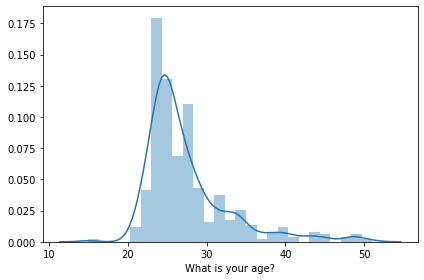

In [22]:
# Histogram: 
sns.distplot(a = survey_df['What is your age?'],
                 hist = True,
                 kde = True)
    
plt.tight_layout()
plt.show()

We see that most of the respondents are concentrated in the age group between 20 to 40. So we define the thresholds as follows:

In [23]:
# Dividing age in categories: 
# Creating loop to define categories according to ratings
age_lst = []

for row,col in survey_df.iterrows():
    if survey_df.loc[row,'What is your age?'] < 25:
        age_lst.append('< 25')
    elif survey_df.loc[row,'What is your age?'] < 30:
        age_lst.append('25-30')
    else:
        age_lst.append('>=30')

# Adding new variable to dataset
survey_df['age_category'] = pd.Series(age_lst)

In [24]:
# Checking dataset with new categorical variable: 
survey_df.head(n=5)

print(f"""
Age Group
------
{survey_df['age_category'].value_counts().sort_index()}

""")


Age Group
------
25-30    171
< 25     115
>=30      82
Name: age_category, dtype: int64




In [25]:
# Creating a copy of the original data before merging variables: 
survey_df_original = survey_df

<h3> Creating new variables with Big5 Personalities and Hult DNA </h3><br>
Based on the pattern identified, we shall create new columns which aggregate (mean) of each Personality and trait.
Finding the mean doesn't skew the weightage of each Big5 Personality (5 questions for each) and Hult DNA traits(6 questions for each). This way, Hult DNA doesn't get more weightage over Big5. Averaging also helps overcome the duplicate variables.

In [26]:
# Creating new variables: 
survey_df['Agreeableness'] = survey_df.iloc[:,[2, 7, 12, 17, 22, 27, 32, 37, 42, 47]].mean(axis=1)
survey_df['Communicating'] = survey_df.iloc[:,[57, 60, 61, 62, 63, 64, 65]].mean(axis=1)
survey_df['Conscientousness'] = survey_df.iloc[:,[3, 8, 13, 18, 23, 28, 33, 38, 43, 48]].mean(axis=1)
survey_df['Extraversion'] = survey_df.iloc[:,[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]].mean(axis=1)
survey_df['Neuroticism'] = survey_df.iloc[:,[4, 9, 14, 19, 24, 29, 34, 39, 44, 49]].mean(axis=1)
survey_df['Openness'] = survey_df.iloc[:,[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]].mean(axis=1)
survey_df['Team building'] = survey_df.iloc[:,[66, 67, 68, 69, 70, 71]].mean(axis=1)
survey_df['Thinking'] = survey_df.iloc[:,[51, 52, 53, 54, 55, 56, 58, 59]].mean(axis=1)

In [27]:
# Dropping original variables: 
survey_df = survey_df.drop(survey_df.columns[1:72], axis = 1)

In [28]:
# survey_df.columns

We shall check the correlation between the Big5 personalities and the traits to understand if the inverse has been implemented effectively and to see the correlation between our variables.

In [29]:
# Checking correlation of original question:
survey_df_original_corr = survey_df_original.corr().round(2)
#survey_df_original_corr.to_excel('survey_df_original_corr.xlsx')

***
<h2> Scaling the data </h2><br>
We need to ensure that we have a variance of 1 and mean of 0 in order to get the best results as classifying algorithms require standardized data.

In [30]:
# Scaling dataset: 

# Dropping demographic information:
survey_int_df = survey_df.drop(['surveyID',
                                'What laptop do you currently have?',
                                'What laptop would you buy in next assuming if all laptops cost the same?',
                                'What program are you in?',
                                'What is your age?',
                                'Gender',
                                'What is your nationality? ',
                                'What is your ethnicity?',
                                'age_category',
                                'list_1',
                                'list_2',
                                'list_3',
                                'age_category',
                                'outliers_responses',
                                'Total'],axis = 1)

# Instantiating:
scaler = StandardScaler()

# Fitting:
scaler.fit(survey_int_df)

# Transforming:
X_scaled = scaler.transform(survey_int_df)

# Converting into a DataFrame:
survey_scaled = pd.DataFrame(X_scaled)

# reattaching column names
survey_scaled.columns = survey_int_df.columns


# checking pre- and post-scaling variance
#print(pd.np.var(survey_int_df), '\n\n')
#print(pd.np.var(survey_scaled))

<h2> Category correlations </h2><br>
After looking at the results of the Standard Scaler, we ran correlations to see which categories relate to what.

In [31]:
# Correlation: 
survey_df_corr = survey_scaled.corr().round(2)
survey_df_corr

,Agreeableness,Communicating,Conscientousness,Extraversion,Neuroticism,Openness,Team building,Thinking
Agreeableness,1.00,0.46,0.28,0.25,-0.10,0.29,0.44,0.35
Communicating,0.46,1.00,0.36,0.35,-0.22,0.41,0.63,0.63
Conscientousness,0.28,0.36,1.00,0.06,-0.22,0.28,0.38,0.49
Extraversion,0.25,0.35,0.06,1.00,-0.14,0.22,0.25,0.34
Neuroticism,-0.10,-0.22,-0.22,-0.14,1.00,-0.09,-0.11,-0.17
Openness,0.29,0.41,0.28,0.22,-0.09,1.00,0.38,0.55
Team building,0.44,0.63,0.38,0.25,-0.11,0.38,1.00,0.60
Thinking,0.35,0.63,0.49,0.34,-0.17,0.55,0.60,1.00


***
<h2>Principal Component Analysis (PCA) </h2>

<h3> Building PCA </h3><br>
We print the original and PCA shape to check whether or not we are in the right direction

In [32]:
# Building PCA: 
# Instantiating a PCA object:
pca = PCA(n_components = None,
                   random_state = 222)

# Fitting and transforming:
survey_pca = pca.fit_transform(X_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :",  survey_pca.shape)

Original shape: (380, 8)
PCA shape     : (380, 8)


<h3> Evaluating PCA Algorithms </h3><br>
We look at the different PCA variances

In [33]:
# Comparing different components: 
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.43
PC 2 : 0.124
PC 3 : 0.119
PC 4 : 0.095
PC 5 : 0.078
PC 6 : 0.073
PC 7 : 0.044
PC 8 : 0.037


<h3> Getting a Scree Plot for optimum number of components </h3><br>
This will help us understand how can we optimize our number of components. The idea is to keep it tight (as few as possible) but also cover most of the data

<h4> Set-up for Scree Plots </h4>

In [34]:
# Creating scree_plot function: 
def scree_plot(pca_object, export = False):

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)

    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')

    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
        
    # displaying the plot
    plt.show()

<h4> Printing Scree Plots </h4><br>
After we printed the scree plot, we will evaluate the location of the "Elbow Point" in the line graph

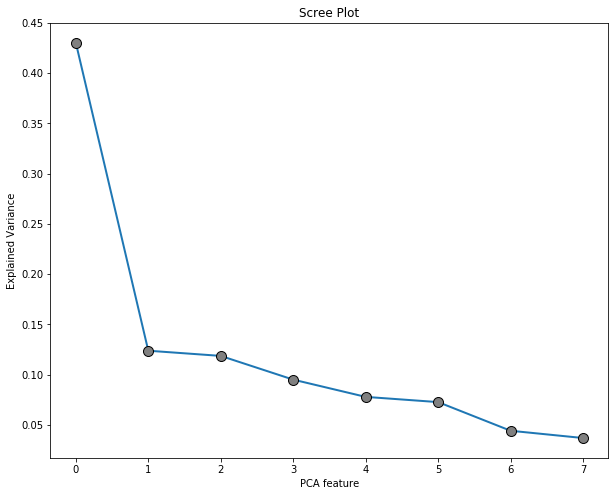

Considering the plot, we will limit the number of components to 4.


In [35]:
# Plotting PCA (scree plot): 
scree_plot(pca_object = pca)

print("Considering the plot, we will limit the number of components to 4.")

<h4> Defining number of components </h4><br>
Reducing components, instantiating, fitting and transforming the data before comparing the dimensions of both dataframes.
While 7 components have been displayed on the scree plot, the elbow point is at 2. But this covers merely 50% of the data. We will go ahead with 4 as this covers almost 80% of the data.

In [36]:
# Reducing number of components to 4: 
# Instantiating a PCA object:
pca = PCA(n_components = 4,
                   random_state = 222)

# Fitting and transforming:
survey_pca = pca.fit_transform(X_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :",  survey_pca.shape)

Original shape: (380, 8)
PCA shape     : (380, 4)


<h4> Classifying components </h4><br>
To check how do the components fare against the defined personalities and traits

In [37]:
# Transposing pca components: 
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))

# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(survey_scaled.columns)

# checking the result
print(factor_loadings_df.round(2))

# saving to Excel
#factor_loadings_df.to_excel('survey_factor_loadings.xlsx')

                     0     1     2     3
Agreeableness     0.33  0.17 -0.06  0.69
Communicating     0.44  0.05 -0.08  0.12
Conscientousness  0.32 -0.35  0.50  0.02
Extraversion      0.25  0.13 -0.79 -0.15
Neuroticism      -0.16  0.88  0.28 -0.01
Openness          0.35  0.18  0.11 -0.60
Team building     0.42  0.15  0.13  0.20
Thinking          0.45  0.03  0.10 -0.28


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


<h4> Naming the components </h4><br>
The PCA is reflective of which Big5 Personality and Hult DNA trait is present and absent in a persona. To give a quick understanding of the persona, we will coin the names based on the cult favourite sitcom, Friends. <br>
The <b>first component</b>, isn't strongly related to any one Personality or trait. <b>Phoebe</b> (Buffay) seems a great fit for this persona since she is unpredictable.<br>
The <b>second component</b> is strongly related to Neuroticism. <b>Monica</b> (Geller) is an easy choice for this persona as she is highly neurotic.<br>
The <b>third component</b> is negatively correlated to Extraversion and is high on Conscientousness. <b>Chandler</b> (Bing) has often made it evident that he has low social skills but is responsible with his job. Thus, making him an apt representation of the third persona.<br>
Lastly, <b>Joey</b> (Tribbiani), who is considered the nicest 'friend' but also often dumb will rightly represent the <b>fourth component</b> which is high on Agreeableness and low on Openness. 

In [38]:
# Defining a name for each component: 
factor_loadings_df.columns = ['Phoebe',
                              'Monica',
                              'Chandler',
                              'Joey']


# checking the result
factor_loadings_df.round(2)

,Phoebe,Monica,Chandler,Joey
Agreeableness,0.33,0.17,-0.06,0.69
Communicating,0.44,0.05,-0.08,0.12
Conscientousness,0.32,-0.35,0.50,0.02
Extraversion,0.25,0.13,-0.79,-0.15
Neuroticism,-0.16,0.88,0.28,-0.01
Openness,0.35,0.18,0.11,-0.60
Team building,0.42,0.15,0.13,0.20
Thinking,0.45,0.03,0.10,-0.28


<h4> Creating a dataframe with our personas</h4>

In [39]:
# Creating PCA DataFrame: 
survey_pca = pd.DataFrame(survey_pca)

# renaming columns
survey_pca.columns = factor_loadings_df.columns

# checking results
survey_pca.round(2)

,Phoebe,Monica,Chandler,Joey
0,0.01,-0.28,0.40,-0.19
1,0.36,0.16,1.16,-0.55
2,-1.60,-2.15,-0.67,-1.22
3,0.48,0.81,-0.06,0.41
4,-3.19,0.21,-0.56,-0.67
...,...,...,...,...
375,0.19,-1.07,0.59,0.24
376,-1.53,0.26,0.24,-0.08
377,3.12,-1.55,0.89,0.13
378,3.61,-1.21,-0.88,0.66


***
<h2> Clustering </h2>

<h3> Preparing data </h3>

In [40]:
# Scaling dataset: 
# Instantiating:
scaler = StandardScaler()

# Fitting:
scaler.fit(survey_pca)

# Transforming:
X_scaled_pca = scaler.transform(survey_pca)

# Converting into a DataFrame:
pca_scaled = pd.DataFrame(X_scaled_pca)

# Defining column names:
pca_scaled.columns = ['Phoebe','Monica','Chandler','Joey']

# checking pre- and post-scaling variance
#print(pd.np.var(survey_pca), '\n\n')
#print(pd.np.var(pca_scaled))

<h3> Dendrogram </h3>
To help us understand the cluster formation

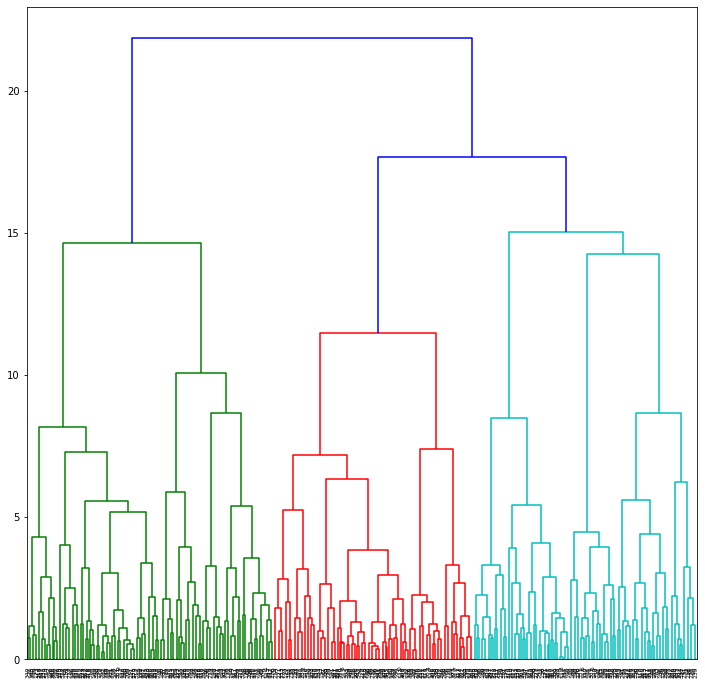

In [41]:
# Plotting dendrogram: 
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

# saving and displaying the plot
plt.show()

We can see three clearly bifurcated clusters.

<h3> Inertia Plot </h3>

In [42]:
# Creating function for inertia plot: 
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

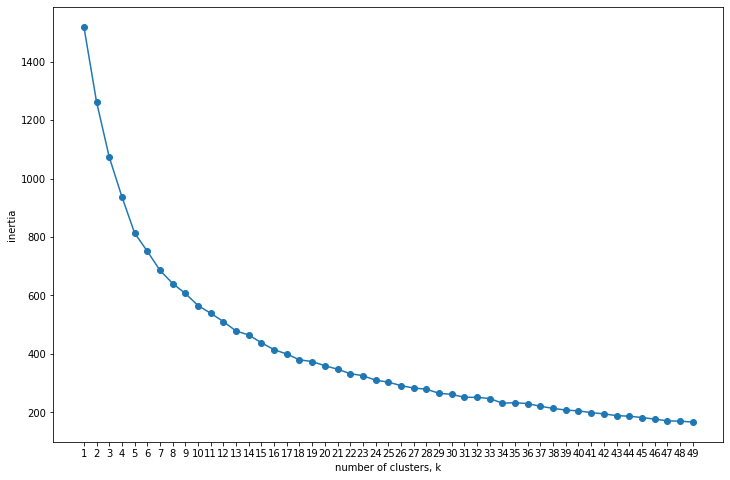

In [43]:
# Plotting inertia plot: 
inertia_plot(data = pca_scaled)

<h3> Clustering data </h3>
Using the obtained optimum number of clusters and kNearest Neighbours.

In [44]:
# Defining clusters: 
# INSTANTIATING a k-Means object with three clusters
survey_k_pca = KMeans(n_clusters = 3,
                         random_state = 222)


# fitting the object to the data
survey_k_pca.fit(pca_scaled)

# converting the clusters to a DataFrame
survey_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})


# checking the results
print(survey_kmeans_pca.iloc[: , 0].value_counts())

1    143
2    134
0    103
Name: Cluster, dtype: int64


<h3> Displaying centeroids </h3>

In [45]:
# Displaying centroids per cluster: 
# storing cluster centers
centroids_pca = survey_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# renaming principal components
centroids_pca_df.columns = ['Phoebe',
                            'Monica',
                            'Chandler',
                            'Joey']

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Phoebe,Monica,Chandler,Joey
0,-0.61,0.18,-0.38,-1.00
1,0.59,-0.01,-0.65,0.41
2,-0.16,-0.12,0.99,0.33


***
<h2> Analysis </h2>

In [46]:
# Concatenating cluster memberships with PCA: 
clst_pca_df = pd.concat([survey_kmeans_pca,
                         survey_pca],
                         axis = 1)

# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[ : , ['What laptop do you currently have?',
                                'What laptop would you buy in next assuming if all laptops cost the same?',
                                'What program are you in?',
                                'What is your age?',
                                'Gender',
                                'What is your nationality? ',
                                'What is your ethnicity?',
                                'age_category']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['actual_laptop',
                              'dream_laptop',
                              'hult_program',
                              'age',
                              'gender',
                              'nationality',
                              'ethnicity',
                              'age_category',
                              'n_cluster',
                              'Phoebe',
                              'Monica',
                              'Chandler',
                              'Joey']

# checking the results
#print(final_pca_clust_df.head(n = 5))

Exporting the data for Excel Analysis

In [47]:
#final_pca_clust_df.to_excel('Data_For_Analysis.xlsx')

<h3> Violinplots </h3><br>
We will be plotting violinplots to help understand the distribution of our audience across components and key demographics. Since the violinplots weren't insightful we decided to comment out the code to avoid data dumping. 

In [48]:
# What laptop do you currently have? 

# Component_1
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.violinplot(x = 'actual_laptop',
#            y = 'Phoebe',
#            hue = 'n_cluster',
#            data = final_pca_clust_df)


#plt.tight_layout()
# plt.show()

# Component_2
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'actual_laptop',
#             y = 'Monica',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_3
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'actual_laptop',
#             y = 'Chandler',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_4
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'actual_laptop',
#             y = 'Joey',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

In [49]:
# What laptop would you buy? 

# Component_1
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'dream_laptop',
#             y = 'Phoebe',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_2
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'dream_laptop',
#             y = 'Monica',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_3
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'dream_laptop',
#             y = 'Chandler',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_4
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'dream_laptop',
#             y = 'Joey',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

In [50]:
# What program are you in? 

# Component_1
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'hult_program',
#             y = 'Phoebe',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_2
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'hult_program',
#             y = 'Monica',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_3
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'hult_program',
#             y = 'Chandler',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_4
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'hult_program',
#             y = 'Joey',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

In [51]:
# Gender: 

# Component_1
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'gender',
#             y = 'Phoebe',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_2
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'gender',
#             y = 'Monica',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_3
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'gender',
#             y = 'Chandler',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_4
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'gender',
#             y = 'Joey',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

In [52]:
# What is your ethnicity? 

# Component_1
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'ethnicity',
#             y = 'Phoebe',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_2
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'ethnicity',
#             y = 'Monica',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_3
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'ethnicity',
#             y = 'Chandler',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_4
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'ethnicity',
#             y = 'Joey',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

In [53]:
# What is your age? 

# Component_1
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'age_category',
#             y = 'Phoebe',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_2
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'age_category',
#             y = 'Monica',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_3
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'age_category',
#             y = 'Chandler',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

# Component_4
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.violinplot(x = 'age_category',
#             y = 'Joey',
#             hue = 'n_cluster',
#             data = final_pca_clust_df)


# plt.tight_layout()
# plt.show()

***
<h2> Conclusion </h2>

This analysis helped us to create different personas to understand better the customers that prefer Windows PC and the ones that prefer the Apple MAC and address those that prefer Apple based on their persona. Based on the survey, we have seen that the market is divided in half, but 60% of the population prefer Apple over Windows. Additionally, we recommend, for the next time, to make a shorter version of the survey, because a long survey can cause a person not to answer it thoughtfully as discussed in different <a href="https://greenbookblog.org/market-research-methodology/a-debate-between-survey-length-and-data-quality/">articles</a>. We hope this can help Windows to understand your clientele better and increase their retention and convert the MAC users into Windows users.